<a href="https://colab.research.google.com/github/vedpd/aai-iot-cleaning-and-eda/blob/main/Cleaning%20%26%20EDA%20Assignment%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Name : Ved Prakash Dwivedi
2. Date: 17/01/2026

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#use this cell to import additional libraries or define helper functions
import zipfile
import os

# Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip


--2026-01-17 14:47:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [  <=>               ]  19.68M  51.7MB/s    in 0.4s    

2026-01-17 14:47:33 (51.7 MB/s) - ‘household_power_consumption.zip’ saved [20640916]



In [4]:
import zipfile

with zipfile.ZipFile("household_power_consumption.zip", "r") as zip_ref:
    zip_ref.extractall(".")


## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [5]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/tmp/ipython-input-43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [6]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [8]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [9]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [10]:
#create your Datetime column
df["Datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)

In [11]:
#convert all data columns to numeric types

# Drop original Date and Time columns
df.drop(columns=["Date", "Time"], inplace=True)

# Convert remaining columns to numeric
numeric_cols = df.columns.drop("Datetime")

df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric,
    errors="coerce"
)


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [12]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [13]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]
Date,object
Time,object


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [14]:
df.Date[0]

datetime.date(2006, 12, 16)

In [15]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [16]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

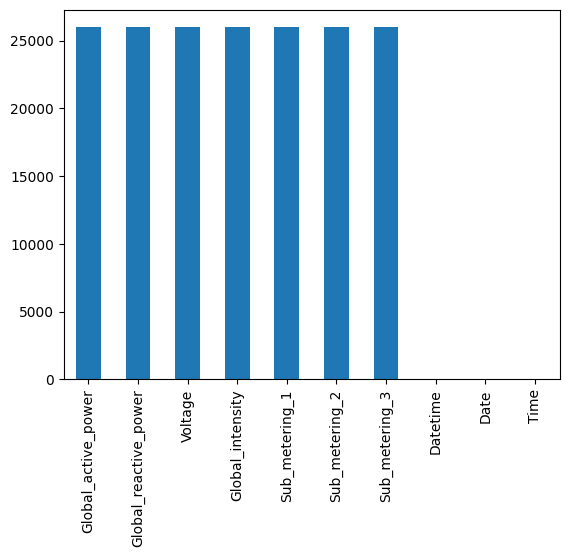

In [17]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

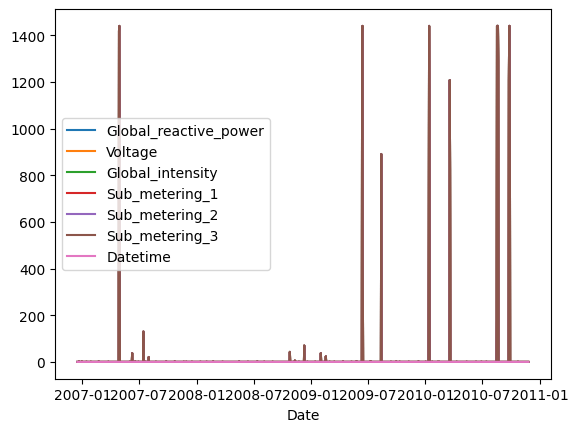

In [18]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A:The missing data is not randomly distributed over time. Instead, it appears in distinct spikes concentrated around specific dates, where multiple variables show missing values simultaneously. This suggests systematic gaps in data collection rather than isolated sensor noise. The clustering of missing values across several features at the same time points indicates likely causes such as temporary sensor outages, data logging failures, or transmission issues, rather than independent measurement errors in individual variables.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: For this dataset, dropping rows with missing values is a reasonable and defensible approach, especially for initial exploratory data analysis. The dataset is very large (over two million records), so removing rows corresponding to short periods of missing data does not significantly reduce the overall data volume or bias long-term trends.

Additionally, because the missing values occur in blocks across multiple variables, simple imputation methods (such as mean or forward fill) could introduce misleading artificial patterns into the time series. Dropping these rows preserves the integrity of observed consumption behavior and avoids making strong assumptions about what the missing values should have been.

For more advanced modeling tasks, time-aware imputation methods (e.g., interpolation or model-based imputation) could be explored, but for this analysis, row removal provides the cleanest and most transparent solution.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [19]:
#clean up missing data here
df = df.dropna().reset_index(drop=True)

In [20]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


In [21]:
# Confirm no missing values remain
df.isna().sum()


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Datetime,0
Date,0
Time,0


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: The variables selected for visualization are Global_active_power, Global_intensity, Voltage, and Sub_metering_3, all of which are continuous measurements capturing different dimensions of household electricity usage.

Global_active_power measures the total active power consumed by the household and serves as a comprehensive indicator of overall energy demand over time. Global_intensity, which represents the total current drawn by the household, is directly related to active power consumption and helps explain variations in electrical load. Examining these two variables together provides insight into how changes in current usage translate into overall power consumption.

Voltage reflects the electrical supply conditions experienced by the household. Analyzing voltage alongside power and intensity helps identify whether fluctuations in consumption coincide with variations in supply stability, which may influence or constrain appliance behavior. Finally, Sub_metering_3 captures energy consumption from high-power appliances such as electric water heaters and air-conditioning systems. This variable is particularly informative because changes in sub-metered appliance usage often drive spikes in both global power and intensity.

Comparing these variables over time enables a multi-level analysis of household electricity consumption, linking appliance-level demand (Sub_metering_3) to aggregate usage (Global_active_power), electrical load (Global_intensity), and supply conditions (Voltage). This integrated view supports deeper exploration of temporal patterns, demand drivers, and system dynamics.

In [22]:
df = df.sort_values("Datetime")

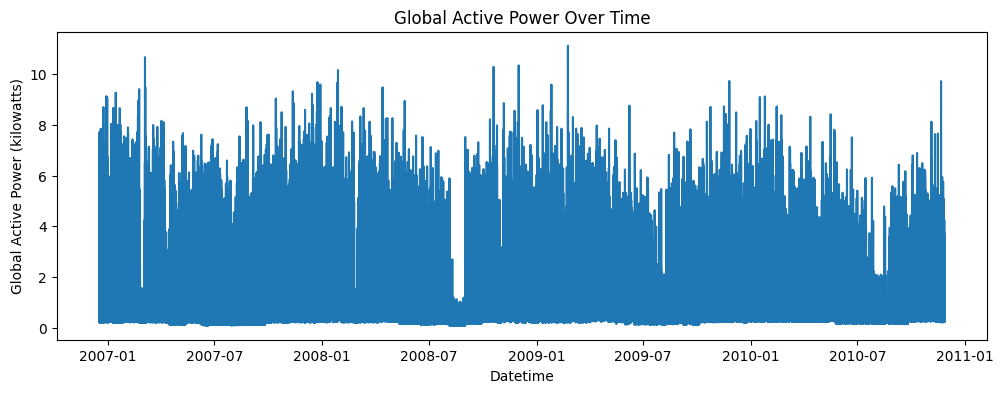

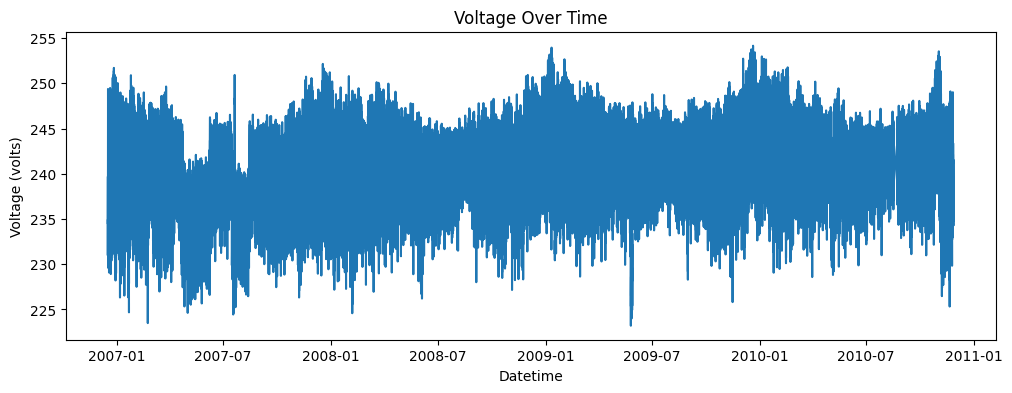

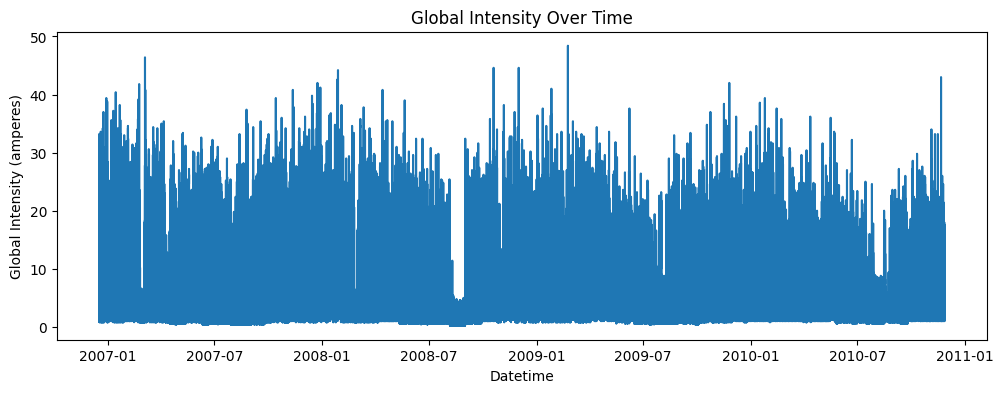

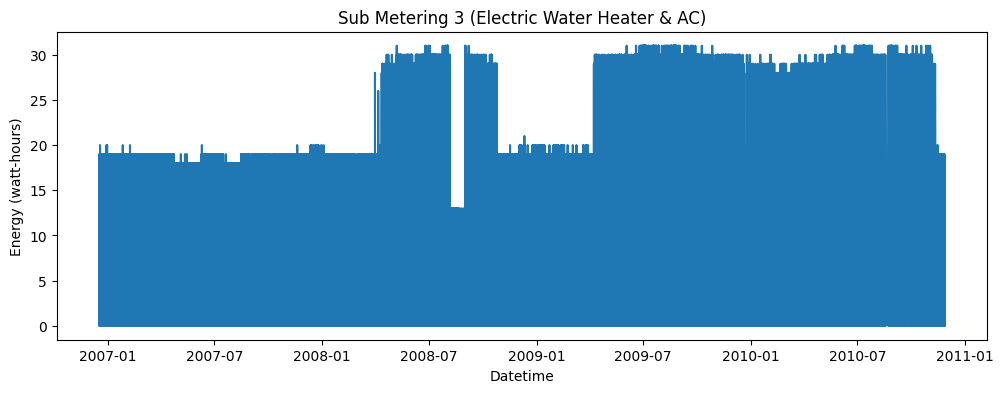

In [23]:
#build your line chart here


#Global Active Power
plt.figure(figsize=(12,4))
plt.plot(df["Datetime"], df["Global_active_power"])
plt.title("Global Active Power Over Time")
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kilowatts)")
plt.show()

#Voltage
plt.figure(figsize=(12,4))
plt.plot(df["Datetime"], df["Voltage"])
plt.title("Voltage Over Time")
plt.xlabel("Datetime")
plt.ylabel("Voltage (volts)")
plt.show()

#Global Intensity
plt.figure(figsize=(12,4))
plt.plot(df["Datetime"], df["Global_intensity"])
plt.title("Global Intensity Over Time")
plt.xlabel("Datetime")
plt.ylabel("Global Intensity (amperes)")
plt.show()

#Sub Metering3
plt.figure(figsize=(12,4))
plt.plot(df["Datetime"], df["Sub_metering_3"])
plt.title("Sub Metering 3 (Electric Water Heater & AC)")
plt.xlabel("Datetime")
plt.ylabel("Energy (watt-hours)")
plt.show()





**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: Visualizing the raw data at its original minute-level granularity reveals a very dense and noisy time series. While the plots do show overall variability and extreme spikes, the high frequency of observations causes significant overplotting, making it difficult to clearly identify longer-term trends, seasonality, or recurring patterns. As a result, the visualization becomes cluttered and individual fluctuations dominate the view.

Although this raw visualization is useful as an initial sanity check to confirm data continuity, range, and the presence of anomalies, it is not particularly effective for deeper analysis or interpretation. Meaningful patterns such as daily cycles, seasonal effects, or sustained changes in consumption are obscured. Aggregating the data over larger time intervals (e.g., hourly, daily, or weekly averages) or applying smoothing techniques would produce more interpretable visualizations and better support subsequent exploratory analysis and modeling. </br> </br>

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [28]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df["Datetime"] = pd.to_datetime(df["Datetime"])


# Select only numeric columns
numeric_cols = df.select_dtypes(include="number").columns

# Compute monthly averages (month + year)
monthly_avg = (
    df
    .set_index("Datetime")[numeric_cols]
    .groupby(pd.Grouper(freq="ME"))
    .mean()
    .reset_index()
)


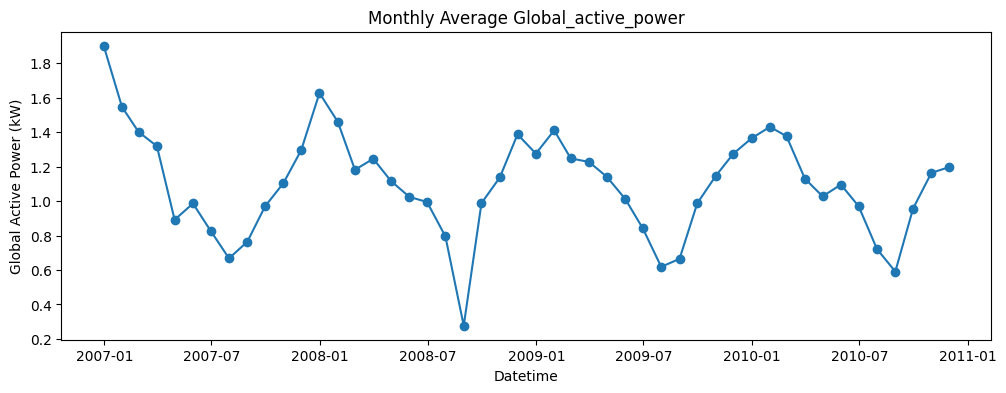

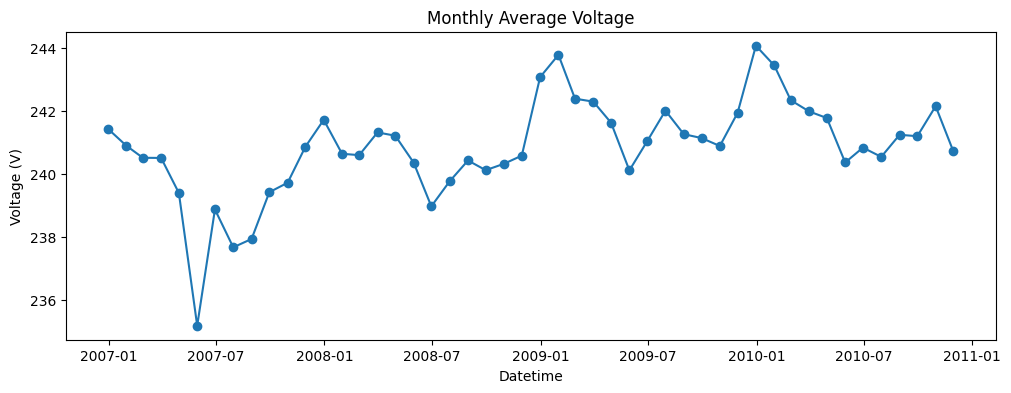

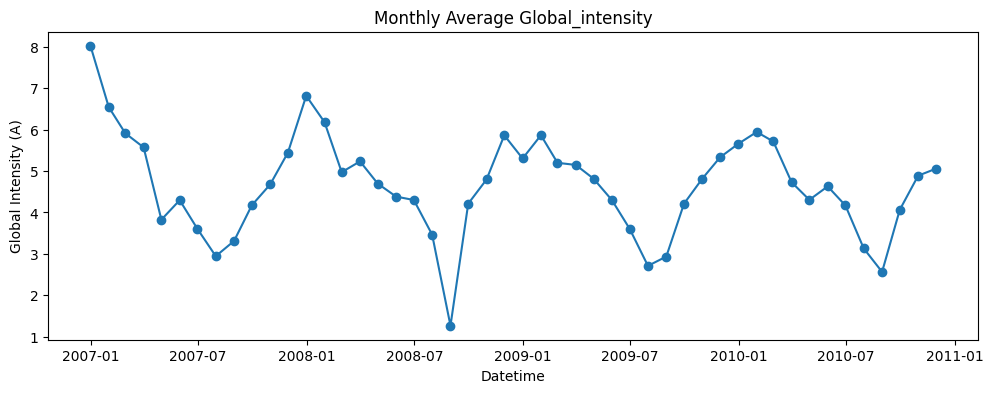

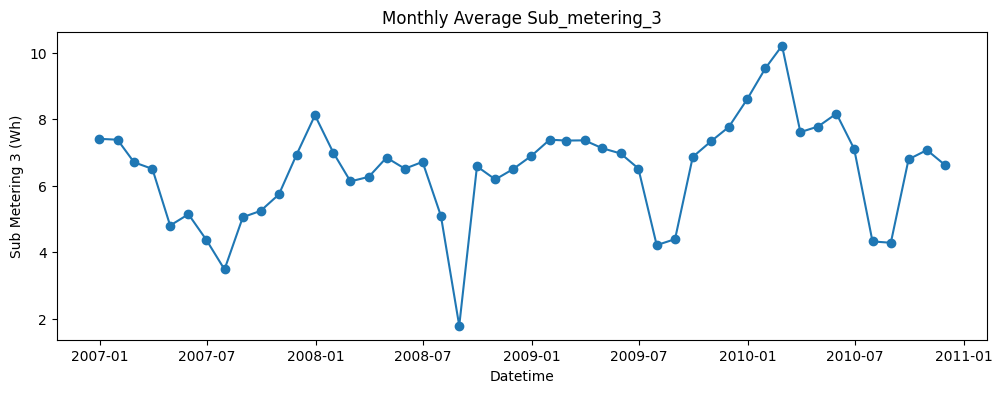

In [29]:
#build your linechart here
import matplotlib.pyplot as plt

variables = [
    ("Global_active_power", "Global Active Power (kW)"),
    ("Voltage", "Voltage (V)"),
    ("Global_intensity", "Global Intensity (A)"),
    ("Sub_metering_3", "Sub Metering 3 (Wh)")
]

for col, ylabel in variables:
    plt.figure(figsize=(12, 4))
    plt.plot(monthly_avg["Datetime"], monthly_avg[col], marker="o")
    plt.title(f"Monthly Average {col}")
    plt.xlabel("Datetime")
    plt.ylabel(ylabel)
    plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The monthly-aggregated data reveals clear seasonal and co-movement patterns that were not easily visible in the raw, high-frequency plots. Both **Global_active_power and Global_intensity** exhibit pronounced cyclical behavior, with higher values during colder months and lower values during warmer months. This pattern is consistent across multiple years, suggesting a strong seasonal component in household electricity demand.

**Sub_metering_3** shows a similar seasonal trend and closely aligns with peaks observed in both global power and intensity. Since this variable captures energy consumption from high-power appliances such as electric water heaters and air-conditioning units, its movement strongly influences overall household demand. The simultaneous rises and drops in ***Sub_metering_3, Global_active_power, and Global_intensity indicate that these variables move together and are driven by common underlying factors***, such as heating and cooling needs.

In contrast, Voltage displays relatively smaller fluctuations and a more stable pattern over time. While there are modest seasonal variations, voltage does not closely track the peaks and troughs seen in the consumption-related variables. This suggests that voltage is largely governed by supply-side conditions rather than household demand.

Overall, **the monthly data shows that Global_active_power, Global_intensity, and Sub_metering_3 are strongly correlated** and move together over time, while Voltage behaves more independently. Aggregating to the monthly level makes these relationships and seasonal trends much clearer. </br> </br>

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Date                   object 
 8   Time                   object 
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [36]:
df = df.sort_index()


#compute your moving average here
rolling_30d = df[numeric_cols].rolling("30D").mean()


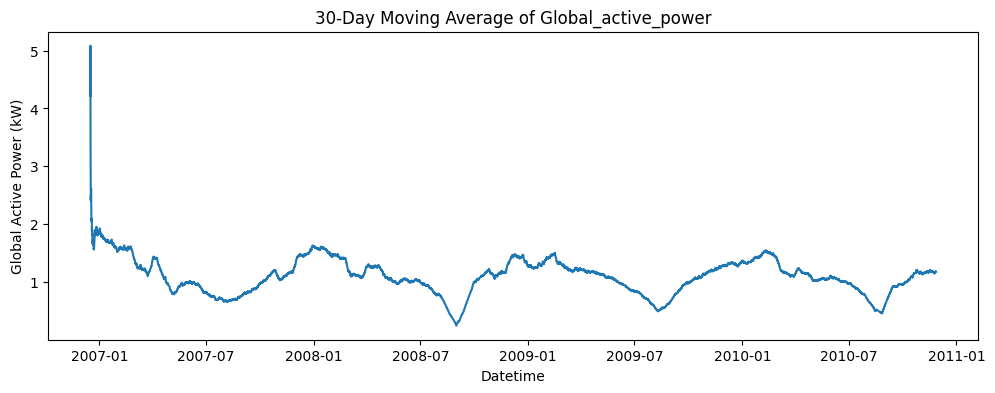

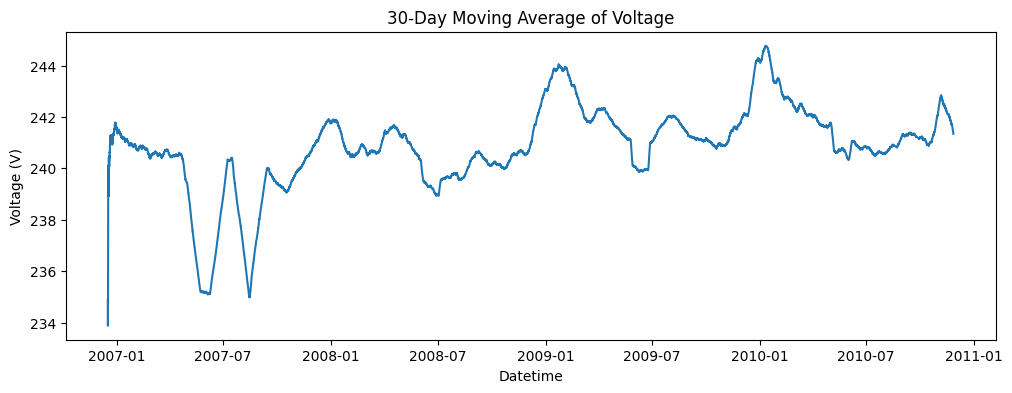

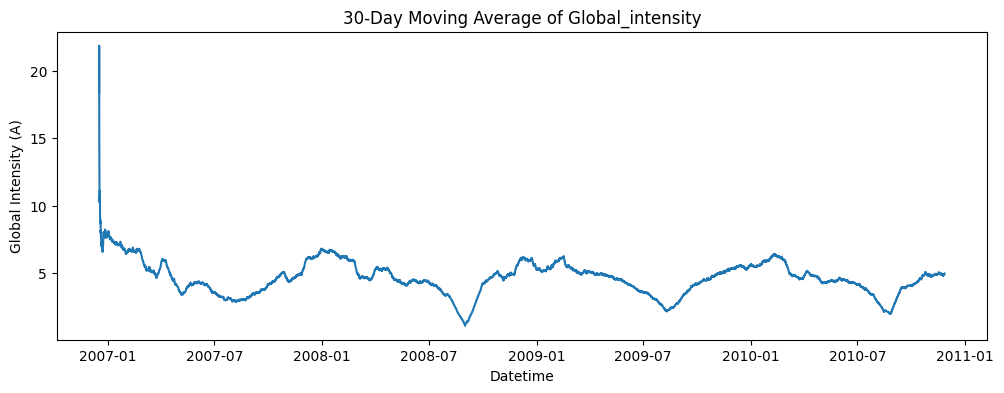

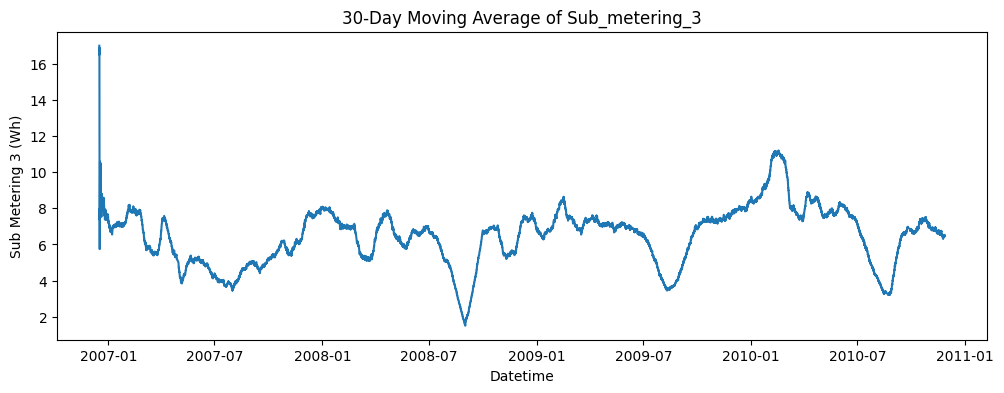

In [37]:
#build your line chart on the moving average here

variables = [
    ("Global_active_power", "Global Active Power (kW)"),
    ("Voltage", "Voltage (V)"),
    ("Global_intensity", "Global Intensity (A)"),
    ("Sub_metering_3", "Sub Metering 3 (Wh)")
]

for col, ylabel in variables:
    plt.figure(figsize=(12, 4))
    plt.plot(rolling_30d.index, rolling_30d[col])
    plt.title(f"30-Day Moving Average of {col}")
    plt.xlabel("Datetime")
    plt.ylabel(ylabel)
    plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The 30-day moving average and the monthly average both smooth the raw time-series data, but they do so in different ways and therefore highlight different aspects of the underlying patterns.

The monthly average aggregates all observations within each calendar month into a single value. This produces a very clean and interpretable visualization that clearly reveals seasonal cycles and long-term trends, such as recurring increases in power consumption and intensity during colder months. Because each month is represented by one point, the monthly average is effective for high-level comparisons across years and for identifying broad demand patterns.

In contrast, the 30-day moving average provides a continuously smoothed view of the data by averaging over a rolling time window. This approach preserves temporal continuity and captures gradual transitions between high and low usage periods that are not visible in the step-wise monthly plot. The moving average also responds more quickly to changes in behavior, making it useful for observing shorter-term shifts and the timing of increases or decreases in consumption.


> Overall, the monthly average is more effective for understanding long-term and seasonal trends, while the 30-day moving average is better for visualizing continuous changes and medium-term dynamics**. For exploratory analysis of household electricity consumption, the monthly average offers greater clarity, whereas the moving average provides richer detail about how trends evolve over time.




## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

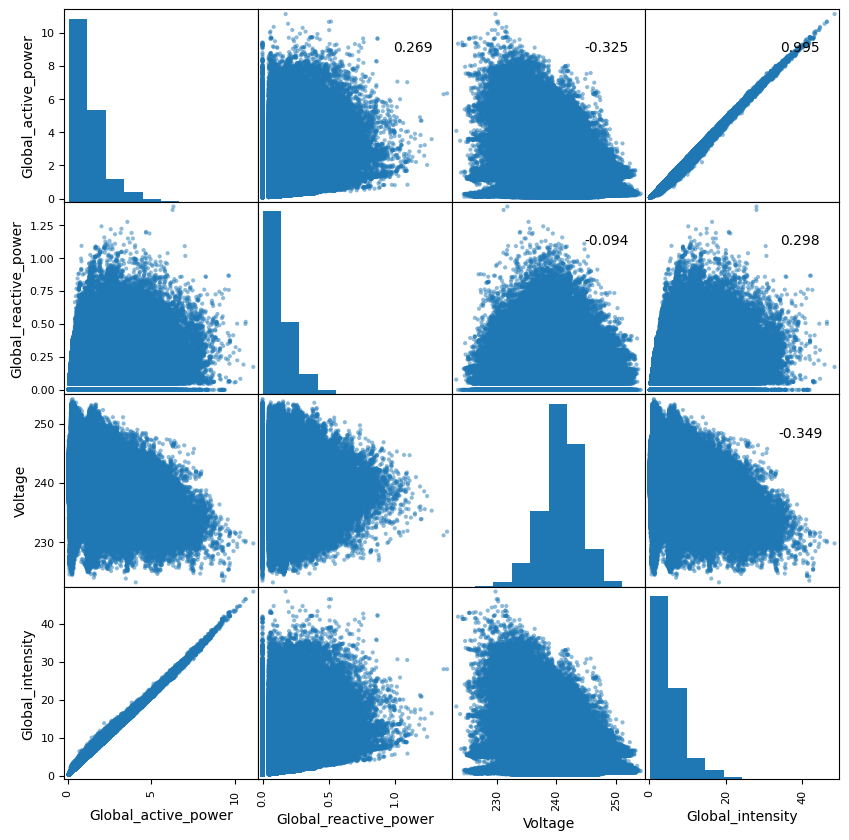

In [38]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:

### Patterns and Correlations Observed

- **Very strong positive correlation** between **Global_active_power** and **Global_intensity**  
  - Spearman correlation ≈ **0.995**  
  - Indicates these two variables capture almost the same information about electrical load.

- **Moderate negative correlation** between **Voltage** and:
  - **Global_active_power** (≈ −0.35)
  - **Global_intensity** (≈ −0.33)  
  - Higher household demand tends to coincide with slight voltage drops.

- **Weak to moderate correlations** involving **Global_reactive_power**:
  - Small positive relationship with active power and intensity.
  - Very weak relationship with voltage.
  - Suggests reactive power reflects different electrical characteristics.

- **Scatter plot shapes indicate nonlinearity**:
  - Relationships are not strictly linear.
  - Justifies the use of **Spearman correlation** instead of Pearson.

---

### Implications for Downstream Tasks

- **Feature redundancy**:
  - *Global_active_power* and *Global_intensity* are highly redundant.
  - Using both may introduce multicollinearity in linear models.

- **Feature selection considerations**:
  - One of the highly correlated variables can be removed or combined.
  - Dimensionality reduction techniques (e.g., PCA) may be beneficial.

- **Model selection impact**:
  - Nonlinear models can better leverage weaker or nonlinear relationships.
  - Voltage and reactive power may add value for anomaly detection and system diagnostics.

- **Improved interpretability**:
  - Understanding correlations helps avoid misleading conclusions.
  - Supports more robust and efficient mode
